In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import json
import pandas as pd

/home/csmajs/jxie031/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/csmajs/jxie031/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/csmajs/jxie031/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/csmajs/jxie031/.local/lib/python3.6/site-packages/tensorflow/

### In here, we successfully generate the universal encoder array for each tweet content. The final data is very large because we have about 305967 tweets in total.

In [2]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [3]:
with open('twitTest.json') as f:
  data = json.load(f)

In [4]:
text=[]
newData = []
for (key, value) in data.items():
    for tweet in value:
        text.append(tweet['text'])
        newData.append([key, tweet["text"], tweet["time"] ])
        
df = pd.DataFrame(newData, columns=['Senator', 'tweet', 'time']) 
  
# print dataframe. 
df 

,Senator,tweet,time
0,SenatorLoeffler,.@Macys is expanding in Georgia!\n\n@gdecd ann...,2020-02-15 20:49:37
1,SenatorLoeffler,Our veterans &amp; service members represent t...,2020-02-15 16:11:53
2,SenatorLoeffler,Sending some much-deserved #ValentinesDay love...,2020-02-14 22:56:40
3,SenatorLoeffler,Happy to work with @MarshaBlackburn on this bi...,2020-02-14 21:09:53
4,SenatorLoeffler,RT @SenHydeSmith: #HappyValentinesDay from the...,2020-02-14 18:40:35
...,...,...,...
305962,JohnBoozman,Happy Birthday #USNavy! Thanks for over two ce...,2016-10-13 23:22:08
305963,JohnBoozman,Thank you @ArFB Appreciate your efforts as we ...,2016-10-13 20:47:00
305964,JohnBoozman,Looking forward to highlighting the work of #A...,2016-10-13 18:42:37
305965,JohnBoozman,It’s my honor and the flag patrol looks great!...,2016-10-13 16:01:20


In [5]:
single = np.split(np.array(text), 3)
print(embed(single[0]).numpy())
embeddings = embed(single[0]).numpy()

[[ 6.2900595e-02 -2.0810576e-02 -2.8870093e-02 ... -7.0225738e-02
  -5.7337217e-02 -6.6082212e-03]
 [ 1.4637580e-02 -3.4412000e-02  9.2208637e-03 ...  2.5616109e-02
   5.7615736e-04  5.4329112e-02]
 [ 9.2715574e-03  3.5796955e-02 -4.9412284e-02 ...  8.9502782e-03
  -2.8513245e-02  4.3611325e-02]
 ...
 [-1.7629255e-03  6.5592274e-02  3.2830078e-02 ... -3.5904642e-02
  -1.6280401e-02  2.3088281e-03]
 [-2.9872144e-03  3.3532542e-05 -3.5749778e-02 ...  2.1570690e-02
   8.2604624e-02  3.4687121e-03]
 [ 1.2076424e-02  7.6919715e-03  6.8239339e-02 ...  2.2967182e-02
  -7.3037498e-02 -6.1348226e-02]]


In [6]:
embeddings.shape

(101989, 512)

In [7]:
embeddings = np.concatenate((embeddings, embed(single[1]).numpy()), axis=0)

In [8]:
embeddings.shape

(203978, 512)

In [9]:
embeddings = np.concatenate((embeddings, embed(single[2]).numpy()), axis=0)

In [10]:
embeddings.shape

(305967, 512)

In [11]:
embeddings = embeddings.tolist()

In [12]:
len(embeddings)

305967

In [13]:
df['use'] = embeddings
df

,Senator,tweet,time,use
0,SenatorLoeffler,.@Macys is expanding in Georgia!\n\n@gdecd ann...,2020-02-15 20:49:37,"[0.0629005953669548, -0.020810576155781746, -0..."
1,SenatorLoeffler,Our veterans &amp; service members represent t...,2020-02-15 16:11:53,"[0.014637580141425133, -0.03441200032830238, 0..."
2,SenatorLoeffler,Sending some much-deserved #ValentinesDay love...,2020-02-14 22:56:40,"[0.009271557442843914, 0.03579695522785187, -0..."
3,SenatorLoeffler,Happy to work with @MarshaBlackburn on this bi...,2020-02-14 21:09:53,"[0.0227094404399395, -0.06247790530323982, 0.0..."
4,SenatorLoeffler,RT @SenHydeSmith: #HappyValentinesDay from the...,2020-02-14 18:40:35,"[0.036325279623270035, -0.004322072025388479, ..."
...,...,...,...,...
305962,JohnBoozman,Happy Birthday #USNavy! Thanks for over two ce...,2016-10-13 23:22:08,"[-0.05527094006538391, -0.06050789728760719, 0..."
305963,JohnBoozman,Thank you @ArFB Appreciate your efforts as we ...,2016-10-13 20:47:00,"[0.038715485483407974, -0.0006181031931191683,..."
305964,JohnBoozman,Looking forward to highlighting the work of #A...,2016-10-13 18:42:37,"[0.024595560505986214, 0.04890052601695061, 0...."
305965,JohnBoozman,It’s my honor and the flag patrol looks great!...,2016-10-13 16:01:20,"[-0.019284779205918312, -0.024209516122937202,..."


### I try to generate the Heatmap of the sentence similarities matrix. However, it is too long to doing that. Even though I also tried to reduce the number of tweet that only working on the tweet after 2020-02, but it still takes a very long time.

In [14]:

#df_filter = df[df['time'] > '2020-02']
#df_filter.shape
#df_filter = list(df_filter['use'])
#len(df_filter)


In [15]:
#row = []
#for element in df_filter:
#    column = []
#    column = map(lambda x: np.dot(x,element), df_filter)
#    row.append(list(column))


# Plot the total number of the tweets they post

In [17]:
senatorTweetCount = df.groupby(['Senator']).count()['tweet']

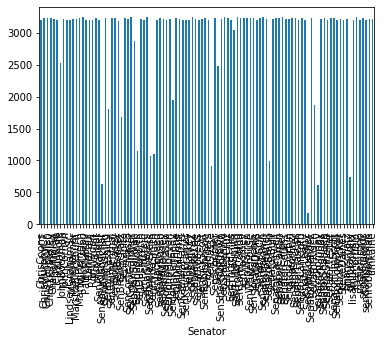

In [19]:
senatorTweetCount.plot.bar()

# The Senator who twit most

In [22]:
senatorTweetCount.max()
print(senatorTweetCount.idxmax(), senatorTweetCount.max())

SenGaryPeters 3249


In [25]:
allText = list(df['tweet'])

KeyboardInterrupt: 

In [30]:
from nltk.tokenize import TweetTokenizer
     
# Create a reference variable for Class SpaceTokenizer 
tk =  TweetTokenizer()
newText = []
for element in allText:
    temp = filter(lambda k: '@' not in k, tk.tokenize(element))
    newText.append(temp)
len(newText)

305967